<a href="https://colab.research.google.com/github/jcdumlao14/CloudcreditsTechnologies-Data-Science-Internship/blob/main/Project_5_image_classification_Improved_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 5 -Image classification**



# **🔧 Improved the Model**

# **2. 🗂️Collect and Prepare Data**
- Download the files from kagglehub dataset

## **2.1.📥 Download the Files**

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jocelyndumlao/colored-flowers-in-bangladesh")

print("Path to dataset files:", path)

100%|██████████| 2.71G/2.71G [00:36<00:00, 80.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1


In [2]:
import os

# Set the base dataset path
dataset_path = '/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1'

# Walk through all directories
print("Directory structure:")
for root, dirs, files in os.walk(dataset_path):
    level = root.replace(dataset_path, '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}- {os.path.basename(root)}/")

Directory structure:
- 1/
    - ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/
        - ColoredFlowersBD/
            - ColoredFlowersBD/
                - Kagoj Phul/
                    - Bulk/
                    - Single/
                - Jaba/
                    - Bulk/
                    - Single/
                - Rangan/
                    - Bulk/
                    - Single/
                - Zinnia/
                    - Bulk/
                    - Single/
                - Sandhyamani/
                    - Bulk/
                    - Single/
                - Radhachura/
                    - Bulk/
                    - Single/
                - Salvia/
                    - Bulk/
                    - Single/
                - Surjomukhi/
                    - Bulk/
                    - Single/
                - Golap/
                    - Bulk/
     

In [3]:
import os

base_path = "/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1"

for root, dirs, files in os.walk(base_path):
    print(root)


/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1
/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision
/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/ColoredFlowersBD
/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/ColoredFlowersBD/ColoredFlowersBD
/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehe

In [4]:
source_root = "/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/ColoredFlowersBD/ColoredFlowersBD"


In [5]:
# Automatically find the correct ColoredFlowersBD path
for root, dirs, files in os.walk(base_path):
    for d in dirs:
        if d == "ColoredFlowersBD":
            source_root = os.path.join(root, d)
            print("Correct source path found:", source_root)
            break

Correct source path found: /root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/ColoredFlowersBD
Correct source path found: /root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/ColoredFlowersBD/ColoredFlowersBD


In [6]:
import os
import shutil
from sklearn.model_selection import train_test_split

# ✅ Your verified source directory
source_root = "/root/.cache/kagglehub/datasets/jocelyndumlao/colored-flowers-in-bangladesh/versions/1/ColoredFlowersBD A Comphrehensive Image Dataset of Colored Flowers in Bangladesh for Identification and Classification Using Machine Learning and Computer Vision/ColoredFlowersBD/ColoredFlowersBD"

# ✅ Target organized directory
target_root = "/content/dataset"
os.makedirs(target_root, exist_ok=True)

# 🔁 Process each flower class
for class_name in os.listdir(source_root):
    class_path = os.path.join(source_root, class_name)
    if not os.path.isdir(class_path):
        continue

    # Collect all image paths from both Bulk and Single folders
    image_paths = []
    for subfolder in ["Bulk", "Single"]:
        sub_path = os.path.join(class_path, subfolder)
        if os.path.isdir(sub_path):
            image_paths.extend([
                os.path.join(sub_path, fname)
                for fname in os.listdir(sub_path)
                if fname.lower().endswith(('.jpg', '.jpeg', '.png'))
            ])

    if len(image_paths) < 10:
        print(f"Skipping {class_name} — too few images.")
        continue

    # Split into train and val sets
    train_imgs, val_imgs = train_test_split(image_paths, test_size=0.2, random_state=42)

    for split, split_imgs in [('train', train_imgs), ('val', val_imgs)]:
        split_dir = os.path.join(target_root, split, class_name)
        os.makedirs(split_dir, exist_ok=True)
        for img_path in split_imgs:
            shutil.copy(img_path, os.path.join(split_dir, os.path.basename(img_path)))

print("✅ Dataset has been split and organized into train/val folders.")


✅ Dataset has been split and organized into train/val folders.


## **2.2. load the data using TensorFlow’s**

We already downloaded and split the dataset into train/ and val/ folders with subfolders per class. Now we load the data using TensorFlow’s ImageDataGenerator.

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (224, 224)
batch_size = 32

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescaling for validation
val_datagen = ImageDataGenerator(rescale=1./255)

train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 6332 images belonging to 13 classes.
Found 1595 images belonging to 13 classes.


# **🔧 9. Improved the Model**

Let’s improve our flower classification model by applying:

- Fine-tuning of the pretrained model (unfreeze some layers of MobileNetV2).

- Learning rate scheduling with callbacks.

- Model checkpointing and early stopping.

- (Optional) You could also increase training epochs.

## **🔧 Improved Model: Fine-Tuning + Callbacks**

In [9]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Setup image size and batch
img_size = (224, 224)
batch_size = 32

# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Dataset directories
train_dir = '/content/dataset/train'
val_dir = '/content/dataset/val'

# Load data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# ✅ FIX: Define class_names after loading data
class_names = list(train_generator.class_indices.keys())

# Load base model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all layers except last 50
for layer in base_model.layers[:-50]:
    layer.trainable = False
for layer in base_model.layers[-50:]:
    layer.trainable = True

# Custom head
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.4)(x)
output = Dense(len(class_names), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# Compile
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary
model.summary()


Found 6332 images belonging to 13 classes.
Found 1595 images belonging to 13 classes.


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,274,637 (8.68 MB)

 Trainable params: 1,871,757 (7.14 MB)

 Non-trainable params: 402,880 (1.54 MB)

## **📦 Add Callbacks**

In [10]:
# Early stopping and saving best model
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6, verbose=1)

callbacks = [early_stop, checkpoint, reduce_lr]


## **🏋️ Train the Improved Model**

In [13]:
epochs = 10  # Increase since we're fine-tuning

history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=callbacks
)


Epoch 1/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9830 - loss: 0.0732

198/198 ━━━━━━━━━━━━━━━━━━━━ 555s 3s/step - accuracy: 0.9830 - loss: 0.0731 - val_accuracy: 0.9241 - val_loss: 0.2110 - learning_rate: 1.0000e-04
Epoch 2/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9916 - loss: 0.0290

198/198 ━━━━━━━━━━━━━━━━━━━━ 543s 3s/step - accuracy: 0.9916 - loss: 0.0290 - val_accuracy: 0.9812 - val_loss: 0.0683 - learning_rate: 1.0000e-04
Epoch 3/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9942 - loss: 0.0218

198/198 ━━━━━━━━━━━━━━━━━━━━ 562s 3s/step - accuracy: 0.9942 - loss: 0.0218 - val_accuracy: 0.9962 - val_loss: 0.0179 - learning_rate: 1.0000e-04
Epoch 4/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9954 - loss: 0.0143

198/198 ━━━━━━━━━━━━━━━━━━━━ 544s 3s/step - accuracy: 0.9954 - loss: 0.0143 - val_accuracy: 0.9987 - val_loss: 0.0093 - learning_rate: 1.0000e-04
Epoch 5/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 553s 3s/step - accuracy: 0.9977 - loss: 0.0094 - val_accuracy: 0.9981 - val_loss: 0.0110 - learning_rate: 1.0000e-04
Epoch 6/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 551s 3s/step - accuracy: 0.9979 - loss: 0.0086 - val_accuracy: 0.9944 - val_loss: 0.0207 - learning_rate: 1.0000e-04
Epoch 7/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 533s 3s/step - accuracy: 0.9959 - loss: 0.0111 - val_accuracy: 0.9981 - val_loss: 0.0048 - learning_rate: 1.0000e-04
Epoch 8/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 543s 3s/step - accuracy: 0.9955 - loss: 0.0120 - val_accuracy: 0.9962 - val_loss: 0.0154 - learning_rate: 1.0000e-04
Epoch 9/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 543s 3s/step - accuracy: 0.9982 - loss: 0.0068 - val_accuracy: 0.9981 - val_loss: 0.0090 - learning_rate: 1.0000e-04
Epoch 10/10
198/198 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.997

## **📈 Visualize Improved Accuracy & Loss**

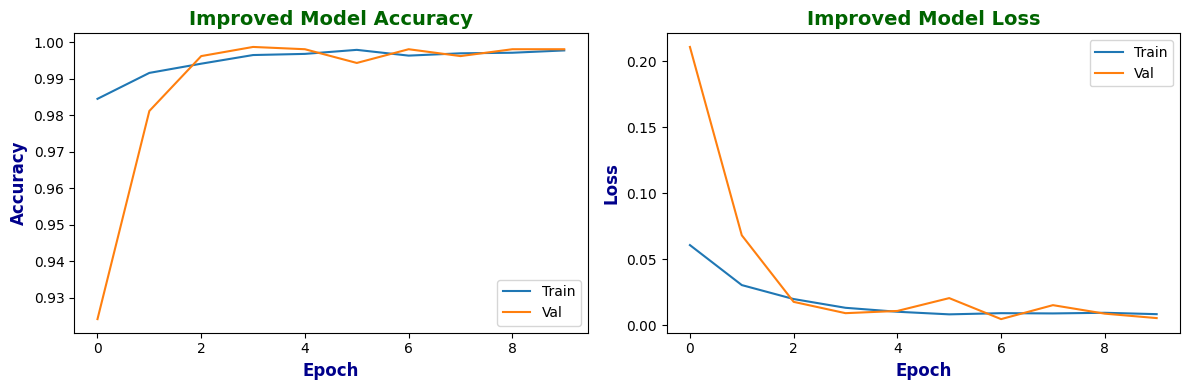

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.title('Improved Model Accuracy', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Epoch', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Accuracy', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Val')
plt.title('Improved Model Loss', fontsize = 14, fontweight = 'bold', color = 'darkgreen')
plt.xlabel('Epoch', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.ylabel('Loss', fontsize = 12, fontweight = 'bold', color = 'darkblue')
plt.legend()

plt.tight_layout()
plt.show()


## **✅ Evaluate Improved Model**

In [15]:
loss, acc = model.evaluate(val_generator)
print(f"✅ Improved Validation Accuracy: {acc:.2%}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step - accuracy: 0.9957 - loss: 0.0075
✅ Improved Validation Accuracy: 99.81%
